# Prabal Ghosh
# LAB -2

## 1. Introduction

In [ ]:
# Preparation
# May show warnings for newly imported packages if run in Colab default python environment.
# Please click the `RESTART RUNTIME` to run the following script correctly.
# The error message of conflicts is acceptable.
!git clone https://github.com/sony/nnabla-examples.git
# !pip install nnabla-ext-cuda116

Cloning into 'nnabla-examples'...
remote: Enumerating objects: 9643, done.
remote: Counting objects: 100% (2201/2201), done.
remote: Compressing objects: 100% (880/880), done.
remote: Total 9643 (delta 1280), reused 2117 (delta 1261), pack-reused 7442
Receiving objects: 100% (9643/9643), 299.13 MiB | 14.07 MiB/s, done.
Resolving deltas: 100% (5182/5182), done.
Updating files: 100% (1711/1711), done.


In [ ]:
!pip install nnabla-ext-cuda120

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 104.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: Cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8
ERROR: pip's dependency resolver does not curren

## 2. Packages Function added

In [ ]:
def get_p_rule(y_pred, z_values, threshold=0.5):
    """
    Compute the p%-rules for the classifier
    Note : threshold our classifier at 0.5 to make its prediction it binary.
    (For more info : https://arxiv.org/pdf/1507.05259.pdf)

    Args:
        y_pred: data predicted (calculated, output) by your model
        z_values: protected attribute values
        threshold: threshold of classifier

    Returns:
        p% rule (float): p%
    """

    y_z_1 = y_pred[z_values ==
                   1] > threshold if threshold else y_pred[z_values == 1]
    y_z_0 = y_pred[z_values ==
                   0] > threshold if threshold else y_pred[z_values == 0]
    odds = y_z_1.mean() / y_z_0.mean()
    return np.min([odds,1/odds])*100

In [ ]:




def get_fairness(y, privileged_group, preds):
    """
    Compute multiple fairness metrics for the classifier:
    1. Demographic parity
    2. Equal opportunity
    3. Equalized odds

    Args:
        y : True data (or target, ground truth)
        privileged_group : list of privileged group values
        preds : data predicted (calculated, output) by your model

    Returns:
        demographic_parity_difference (float): Demographic parity
        equal_opportunity_difference (float): Equal opportunity
        average_abs_odds_difference(float): Equalized odds

    """

    y_unprivileged, preds_unprivileged = y[privileged_group ==
                                           False], preds[privileged_group == False]
    y_privileged, preds_privileged, = y[privileged_group], preds[privileged_group]
    cm_unprivileged = confusion_matrix(y_unprivileged, preds_unprivileged)
    cm_privileged = confusion_matrix(y_privileged, preds_privileged)
    unprivileged_PR = (
        cm_unprivileged[1, 1] + cm_unprivileged[0, 1]) / cm_unprivileged.sum()
    privileged_PR = (cm_privileged[1, 1] +
                     cm_privileged[0, 1]) / cm_privileged.sum()

    # compute demographic parity
    demographic_parity_difference = unprivileged_PR - privileged_PR
    unprivileged_TPR = cm_unprivileged[1, 1] / cm_unprivileged[1].sum()
    privileged_TPR = cm_privileged[1, 1] / cm_privileged[1].sum()

    # compute equal opportunity
    equal_opportunity_difference = unprivileged_TPR - privileged_TPR
    unprivileged_FPR = cm_unprivileged[0, 1] / cm_unprivileged[0].sum()
    privileged_FPR = cm_privileged[0, 1] / cm_privileged[0].sum()

    # compute Equalized odds
    average_abs_odds_difference = 0.5 * (
                abs(unprivileged_FPR - privileged_FPR) + abs(unprivileged_TPR - privileged_TPR))

    return demographic_parity_difference, equal_opportunity_difference, average_abs_odds_difference







In [ ]:
def plot_fairness(fairness, ax, metric="DPD", title="fairness metric", bar_x_axis="Original"):
    """
    plot single fairness metric
    """
    ax.set_ylim([-0.6, 0.6])
    ax.axhline(y=0.0, color='r', linestyle='-')
    ax.bar([bar_x_axis], fairness, color="blue", width=2)
    ax.set_ylabel(metric)
    ax.set_title(title, fontsize=10)
    for index, value in enumerate(fairness):
        if value < 0:
            ax.text(index, value - 0.1,
                    str(round(value, 3)), fontweight='bold', color='red', bbox=dict(facecolor='red', alpha=0.4))
        else:
            ax.text(index, value + 0.1,
                    str(round(value, 3)), fontweight='bold', color='red', bbox=dict(facecolor='red',alpha=0.4))

In [ ]:
def plot_fairness_multi(DPD, EOD, AAOD, p_rule, accuracy, bar_x_axis="original"):
    """
    plot three fairness metrics
    """
    fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)
    fig.suptitle("Model Fairness", fontsize=16)
    plot_fairness([DPD], ax=axes[0], metric="DPD",
                  title="Demographic Parity", bar_x_axis=bar_x_axis)
    plot_fairness([EOD], ax=axes[1], metric="EOD",
                  title="Equal Opportunity", bar_x_axis=bar_x_axis)
    plot_fairness([AAOD], ax=axes[2], metric="AAOD",
                  title="Equalized Odds", bar_x_axis=bar_x_axis)
    fig.text(0.92, 0.8, '\n'.join(
        ["Satisfied p%-rules:", f"- p% : {p_rule:.3f}"]), fontsize='15')
    fig.text(0.92, 0.65, '\n'.join(
        ["Accuracy of the model:", f"- accuracy : {accuracy:.3f}"]), fontsize='15')
    plt.show()

In [ ]:
%cd nnabla-examples/responsible_ai/prejudice_remover_regularizer

/content/nnabla-examples/responsible_ai/prejudice_remover_regularizer


In [ ]:
import cv2
from google.colab.patches import cv2_imshow


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import nnabla as nn
from nnabla.logger import logger
import nnabla.functions as F
import nnabla.parametric_functions as PF
import nnabla.solvers as S
from nnabla.utils.data_iterator import data_iterator
from nnabla.utils.data_source import DataSource
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import Markdown

from utils import *

## 3. Data preparation

In [ ]:
X, y, Z = load_adult_dataset()
Z = Z.drop(['race'], axis = 1)

# split into train/test set
(X_train, X_test, y_train, y_test,
 Z_train, Z_test) = train_test_split(X, y, Z, test_size=0.3, stratify=y, random_state=7)

scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(X_train)
X_test = scale_orig.fit_transform(X_test)

features : 28750 samples, 88 attributes

targets : 28750 samples

sensitives attributes : 28750 samples, 2 attributes

In [ ]:
class dataset(DataSource):
    def __init__(self,features, labels, senstive_attribute, shuffle=False):
        super(dataset, self).__init__(shuffle=shuffle)
        self.x = features
        self.y = labels.reshape(-1, 1)
        self.z = senstive_attribute
        self._size = self.y.size
        self._variables = ('x', 'y', 'z')

    def _get_data(self, idx):
        return self.x[idx], self.y[idx], self.z[idx]

trainset = dataset(X_train, y_train.to_numpy(), Z_train.to_numpy(), shuffle=True)
testset = dataset(X_test, y_test.to_numpy(), Z_test.to_numpy())

batachsize = 32
test_batachsize = X_test.shape[0]

trainloader = data_iterator(trainset, batch_size=batachsize)
testloader = data_iterator(testset, batch_size=test_batachsize)

In [ ]:
from nnabla.ext_utils import get_extension_context
context = "cudnn" # for cpu set context as 'cpu'
device_id = 0
ctx = get_extension_context(context, device_id=device_id)
nn.set_default_context(ctx)

In [ ]:
n_feature = nn.Variable((batachsize, 88))
n_label = nn.Variable((batachsize, 1))
n_senstive = nn.Variable((batachsize, 1))

test_feature = nn.Variable((test_batachsize, 88))
test_label = nn.Variable((test_batachsize, 1))
test_senstive = nn.Variable((test_batachsize, 1))

## 3.Base Classifier network



In [ ]:
def Classifier(features_n, n_hidden=32, p_dropout=0.2,train=True):
    with nn.parameter_scope('classifier'):
        l1 = PF.affine(features_n, n_hidden, name='l1')
        l1 = F.relu(l1)
        if (train):
            l1 = F.dropout(l1,p_dropout)
        l2 = PF.affine(l1, n_hidden, name='l2')
        l2 = F.relu(l2)
        if (train):
            l2 = F.dropout(l2,p_dropout)
        l3 = PF.affine(l2, n_hidden, name='l3')
        l3 = F.relu(l3)
        if (train):
            l3 = F.dropout(l3,p_dropout)
        l4 = PF.affine(l3, 1, name='l4')
    return l4

In [ ]:
clf = Classifier(n_feature)
clf_sigm = F.sigmoid(clf)
clf.persistent = True
clf_sigm.persistent = True

In [ ]:
t_clf = Classifier(test_feature,train=False)

In [ ]:
loss = F.sum(F.sigmoid_cross_entropy(clf, n_label))
loss.persistent = True
learning_rate = 1e-03
clf_solver = S.Adam(learning_rate)
with nn.parameter_scope("classifier"):
    clf_solver.set_parameters(nn.get_parameters())
clf_solver.weight_decay(1e-05)
clf_solver.update()

In [ ]:
max_iter = int(trainloader.size / batachsize)
total_epochs = 10
for epoch in range(total_epochs):
    for i in range(max_iter):
        n_feature.d, n_label.d, _ = trainloader.next()
        clf_solver.zero_grad()
        loss.forward(clear_no_need_grad=True)
        loss.backward(clear_buffer=True)
        clf_solver.update()

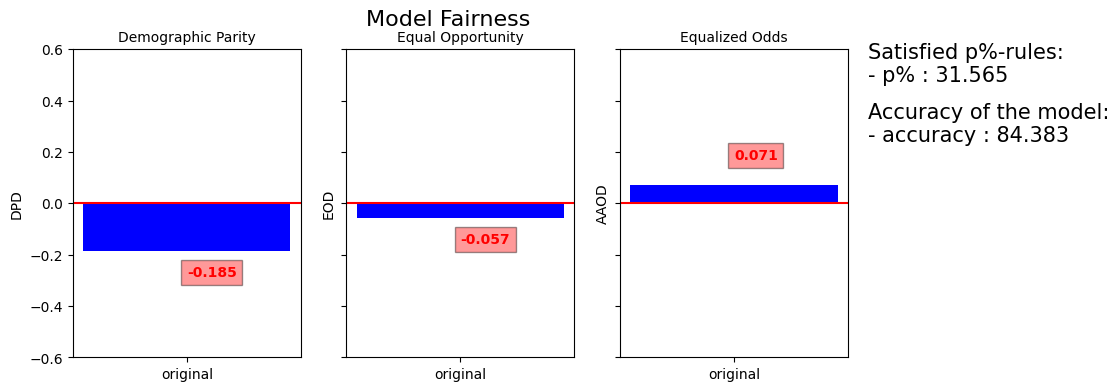

In [ ]:
# model validation & fairness
test_feature.d, test_label.d,test_senstive.d = testloader.next()
v_clf_out = F.sigmoid(t_clf)
v_clf_out.forward(clear_buffer=True)
y_pre_clf = v_clf_out.d.ravel()

preds = np.where(y_pre_clf > 0.5, 1, 0)
DPD,EOD,AAOD = get_fairness(y_test, Z_test['sex'] == 1, preds)
clf_accuracy = metrics.accuracy_score(y_test, preds) * 100

race_p_rule = get_p_rule(y_pre_clf, Z_test['sex'])


plot_fairness_multi(DPD,EOD,AAOD,race_p_rule,clf_accuracy)


### For base model the Demographic parity is -0.181 and andthe p% rule is 36.15% which is not good as the best p % rule 100. But The ACCURACY IS 84 %.

### Model Fairness for Classifier


In [ ]:
test_feature.d, test_label.d,test_senstive.d = testloader.next()
t_clf_out = F.sigmoid(t_clf)
t_clf_out.forward(clear_buffer=True)
y_pre_clf = t_clf_out.d.ravel()
preds = np.where(y_pre_clf > 0.5, 1, 0)
clf_accuracy = metrics.accuracy_score(y_test, preds) * 100

out_f = t_clf_out.d[test_senstive.d == 1]
out_m = t_clf_out.d[test_senstive.d == 0]

clf_cv_score = CVS(out_f,out_m)

In [ ]:
print("Classfier accuracy : ", clf_accuracy,"Classfier CV Score :", clf_cv_score)

Classfier accuracy :  84.38260869565217 Classfier CV Score : 0.1851


## Adversarial Debiasing

In [ ]:
loss = F.mean(F.sigmoid_cross_entropy(clf, n_label))

loss.persistent = True

learning_rate = 1e-03

clf_solver = S.Adam(learning_rate)

with nn.parameter_scope("classifier"):
    clf_solver.set_parameters(nn.get_parameters())





In [ ]:
def Adversary(clf_out,n_hidden=32):
    with nn.parameter_scope("adversary"):
        Al1 = PF.affine(clf_out, n_hidden, name='Al1')
        Al1 = F.relu(Al1)
        Al2 = PF.affine(Al1, n_hidden, name='Al2')
        Al2 = F.relu(Al2)
        Al3 = PF.affine(Al2, n_hidden, name='Al3')
        Al3 = F.relu(Al3)
        Al4 = PF.affine(Al3,1, name='Al4')
        return Al4

In [ ]:
adv = Adversary(clf)

In [ ]:
lamdas = 130
adv_loss = F.mean(F.mul_scalar(F.sigmoid_cross_entropy(adv, n_senstive), lamdas))
adv_solver = S.Adam(learning_rate)
with nn.parameter_scope("adversary"):
     adv_solver.set_parameters(nn.get_parameters())

In [ ]:
clfloss = loss - adv_loss

In [ ]:
max_iter = 449
for epoch in range(200):
    clf.need_grad = False
    for i in range(max_iter):
        n_feature.d, n_label.d, n_senstive.d = trainloader.next()
        adv_solver.zero_grad()
        adv_loss.forward()
        adv_loss.backward(clear_buffer=True)
        adv_solver.update()

    for i in range(max_iter):
        n_feature.d, n_label.d, n_senstive.d = trainloader.next()
        pass
    clf.need_grad = True
    loss.forward(clear_no_need_grad=True)
    clf_solver.zero_grad()
    clfloss.forward(clear_no_need_grad=True)
    clfloss.backward(clear_buffer=True)
    clf_solver.update()

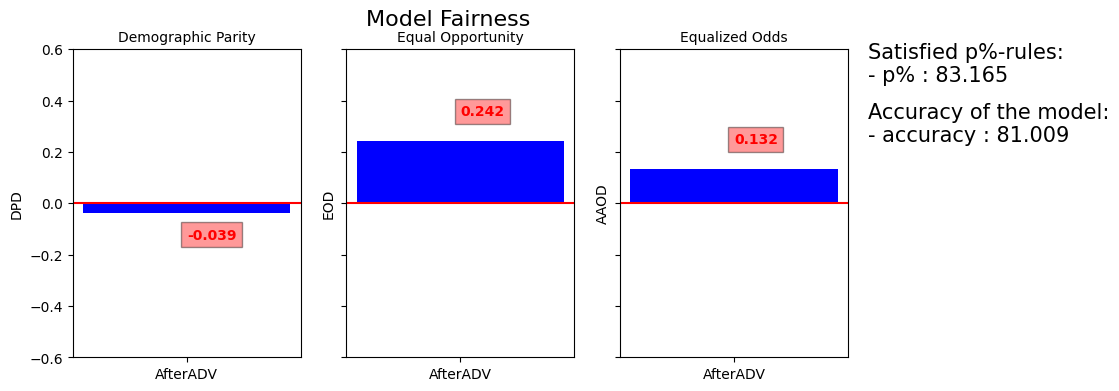

In [ ]:
test_feature.d, test_label.d,test_senstive.d = testloader.next()
v_clf_out.forward(clear_buffer=True)
y_pre_clf = v_clf_out.d.ravel()
preds = np.where(y_pre_clf > 0.5, 1, 0)
DPD,EOD,AAOD = get_fairness(y_test, Z_test['sex'] == 1, preds)
clf_accuracy = metrics.accuracy_score(y_test, preds) * 100
race_p_rule = get_p_rule(y_pre_clf, Z_test['sex'])
plot_fairness_multi(DPD,EOD,AAOD,race_p_rule,clf_accuracy,"AfterADV")

### After applying Adversarial Debiasing  the p% rule is improved to 83.165% and accuracy drops to 81% but Equal opportunity and equalized odds were increased. So This Adversarial Debiasing approach improve p% rule but panalize Equal opportunity and equalized odds

In [ ]:
out_f = t_clf_out.d[test_senstive.d == 1]
out_m = t_clf_out.d[test_senstive.d == 0]

clf_cv_score = CVS(out_f,out_m)

In [ ]:
print("Classfier accuracy : ", clf_accuracy,"Classfier CV Score :", clf_cv_score)

Classfier accuracy :  81.00869565217391 Classfier CV Score : 0.1851


## 4. Prejudice Remover Regularizer


In [ ]:
clf = Classifier(n_feature)
clf_sigm = F.sigmoid(clf)
clf.persistent = True
clf_sigm.persistent = True

In [ ]:
t_clf = Classifier(test_feature,train=False)


In [ ]:
loss = F.sum(F.sigmoid_cross_entropy(clf, n_label))
loss.persistent = True
learning_rate = 1e-03
clf_solver = S.Adam(learning_rate)
with nn.parameter_scope("classifier"):
    clf_solver.set_parameters(nn.get_parameters())
clf_solver.weight_decay(1e-05)
clf_solver.update()

In [ ]:
def pr_loss(output_f, output_m, eta):
    """
    Prejudice Remover Regularizer

    Args:
        output_f (NNabla Variable): output of unprivileged class
        output_m (NNabla Variable) : output of privileged class
        eta : Parameter for Prejudice Remover(eta)
    Returns:
        Prejudice Index
    """
    N_female = F.constant(output_f.shape[0])
    N_male   = F.constant(output_m.shape[0])
    Dxisi = F.stack(N_male,N_female,axis=0) #male sample, #female sample
    # Pr[y|s]
    y_pred_female = F.sum(output_f)
    y_pred_male   = F.sum(output_m)
    P_ys = F.stack(y_pred_male,y_pred_female,axis=0) / Dxisi
    P = F.concatenate(output_f,output_m,axis=0)
    P_y =  F.sum(P) / (output_f.shape[0]+output_m.shape[0])
    P_s1y1 = F.log(P_ys[1]) - F.log(P_y)
    P_s1y0 = F.log(1-P_ys[1]) - F.log(1-P_y)
    P_s0y1 = F.log(P_ys[0]) - F.log(P_y)
    P_s0y0 = F.log(1-P_ys[0]) - F.log(1-P_y)

    P_s1y1 = F.reshape(P_s1y1,(P_s1y1.d.size,))
    P_s1y0 = F.reshape(P_s1y0,(P_s1y0.d.size,))
    P_s0y1 = F.reshape(P_s0y1,(P_s0y1.d.size,))
    P_s0y0 = F.reshape(P_s0y0,(P_s0y0.d.size,))

    # PI
    PI_s1y1 = output_f * P_s1y1
    PI_s1y0 =(1- output_f) * P_s1y0
    PI_s0y1 = output_m * P_s0y1
    PI_s0y0 = (1- output_m )* P_s0y0
    PI = F.sum(PI_s1y1) + F.sum(PI_s1y0) + F.sum(PI_s0y1) + F.sum(PI_s0y0)
    PI = eta * PI
    return PI


In [ ]:
max_iter = int(trainloader.size / batachsize)
acc = [] # to plot the accuracy
cvs_score = [] # to plot the CV score
# eta_value = [0.0,1.0,5.0,10.0,15.0,20.0,50.0] # Parameter for Prejudice Remover
eta_value = [0.0,20.0,50.0] # Parameter for Prejudice Remover

for eta in eta_value :
    nn.clear_parameters()
    for epoch in range(total_epochs):
        for i in range(max_iter):
            n_feature.d, n_label.d, n_senstive.d = trainloader.next()
            clf_solver.zero_grad()
            clf_sigm.forward(clear_no_need_grad=True)
            output_f = clf_sigm[n_senstive.d == 0]
            output_m = clf_sigm[n_senstive.d == 1]
            PILoss = pr_loss(output_f,output_m,eta)
            t_loss = loss + PILoss
            t_loss.forward(clear_no_need_grad=True)
            t_loss.backward(clear_buffer=True)
            clf_solver.update()
    test_feature.d, test_label.d,test_senstive.d = testloader.next()
    t_clf_out = F.sigmoid(t_clf)
    t_clf_out.forward(clear_buffer=True)
    y_pre_clf = t_clf_out.d.ravel()
    preds = np.where(y_pre_clf > 0.5, 1, 0)
    clf_accuracy = metrics.accuracy_score(y_test, preds) * 100
    out_f = t_clf_out.d[test_senstive.d == 0]
    out_m = t_clf_out.d[test_senstive.d == 1]
    cvscore = CVS(out_f,out_m)
    acc.append(clf_accuracy)
    cvs_score.append(cvscore)

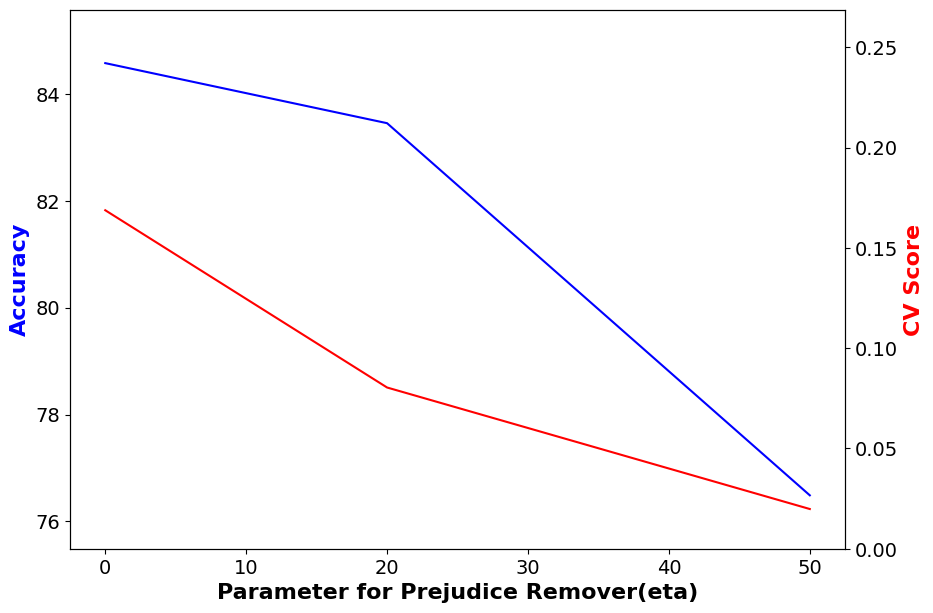

In [ ]:
fairness_plot(eta_value,'Parameter for Prejudice Remover(eta)',acc,"Accuracy",cvs_score,"CV Score")

The plot above shows impact of different eta values on model performance and fairness.

It can be observed that the model fairness improves after induction of PRR into training, compared to baseline model.

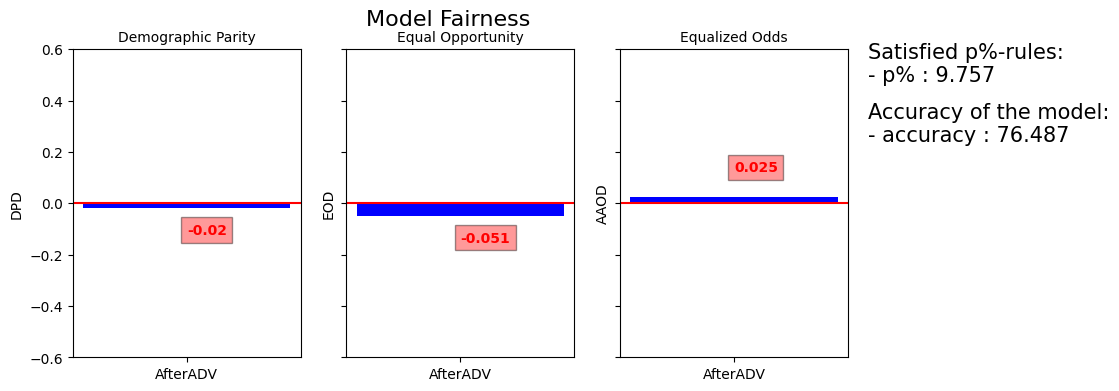

In [ ]:
# test_feature.d, test_label.d,test_senstive.d = testloader.next()
# t_clf_out.forward(clear_buffer=True)
# y_pre_clf = t_clf_out.d.ravel()
# preds = np.where(y_pre_clf > 0.5, 1, 0)
DPD,EOD,AAOD = get_fairness(y_test, Z_test['sex'] == 1, preds)
# clf_accuracy = metrics.accuracy_score(y_test, preds) * 100
race_p_rule = get_p_rule(y_pre_clf, Z_test['sex'])
plot_fairness_multi(DPD,EOD,AAOD,race_p_rule,clf_accuracy,"AfterADV")

### After applying Prejudice Remover Regularizer Demographic parity and equal odds and equal oppurtunity values goes to approx 0 which is good but the p% rule is decreased to 25% and accuracy dropped to 75%.

#So finally we can conclude that the base model gives 84% accuracy but that model is biased as the demographic parity is -ve(-0.18) and p% rule(36%) is low

# After applying Adversarial Debiasing  the p% rule is improved to 83.165% and accuracy drops to 81% but Equal opportunity and equalized odds were increased. So This Adversarial Debiasing approach improve p% rule but panalize Equal opportunity and equalized odds

# After applying Prejudice Remover Regularizer Demographic parity and equal odds and equal oppurtunity values goes to approx 0 which is good that means biases were removed but the p% rule is decreased to 25%  which indecate that privilege and unprivileged protected attribute(SEX) is biased and accuracy dropped to 75%.



# So for different case we choose Adversarial Debiasing and Prejudice Remover Regularizer for bias mitigation

# Summary of Bias Mitigation Techniques

## Base Model:
- Accuracy: 84%
- Biased: Demographic parity is negative (-0.18), and p% rule is low (36%).

## Adversarial Debiasing:
- Accuracy drops to 81%.
- Improvement in p% rule to 83.165%.
- Increase in Equal Opportunity and Equalized Odds.
- However, Equal Opportunity and Equalized Odds penalized.

## Prejudice Remover Regularizer:
- Demographic parity, Equal Odds, and Equal Opportunity approach 0, indicating biases are removed.
- Significant drop in p% rule to 25%, suggesting biases in the protected attribute (SEX).
- Accuracy drops to 75%.

Based on these observations:

- Adversarial Debiasing seems suitable when maintaining higher accuracy is crucial while moderately improving fairness metrics.
- Prejudice Remover Regularizer is effective in removing biases, but it comes at the cost of decreased accuracy and a significant reduction in the p% rule, indicating potential biases in the protected attribute.

Choosing between the two approaches depends on the specific priorities of the application, whether it's more critical to prioritize accuracy or fairness. In some cases, a trade-off between the two may be necessary.
